# Top 10 Cryptocurrencies Price Analysis and Prediction: A Comprehensive Approach
# Group Members : Angeli De Los Reyes, Meyliani Sanjaya,  Nay Zaw Lin

# TABLE OF CONTENTS
1. [PROBLEM DESCRIPTION](#prob)
2. [THE DATA](#data)
    1. [Data Sources](#datasrcs)
    2. [Supplemental Data](#supdata)
3. [BACKGROUND RESEARCH](#research)
4. [READ IN THE DATA](#read)
    1. [API Data Retrieval](#api_data)
    2. [Reading CSV files](#read_csv)
    3. [Reading JSON files](#read_json)
5. [GETTING TO KNOW THE DATA](#know)
6. [DATA PREPARATION](#prepare)
    1. [Cryptocurrency Market Data](#cmd)
        1. [Data Selection](#select_cmd)
        2. [Data Conversion](#convert_cmd)
        3. [Create Daily Returns Column](#create_cmd)
    2. [Social Media Sentiment](#sms)
        1. [Data Selection](#select_sms)
	    2. [Data Conversion](#convert_sms)
        3. [Data Transformation](#transform_sms)
        4. [Top 10 Cryptocurrency Sentiment Analysis](#top10_analysis)
7. [COMBINE THE DATASETS](#combine_df)
8. [COMBINED DATA PREPARATION (EDA)](#prepare_combined)
    1. [Explore Outliers](#outliers)
    2. [Missing Data](#missing_combined)
    3. [Aggregate Data](#aggregate_combined)
    4. [Explore Daily Price Trends](#edpt)
    5. [Explore Top 10 Cryptos Popularity](#popularity)
9. [FIND CORRELATIONS](#find_corr)
    1. [Correlations Plot](#corr_plots)
    2. [Correlations Analysis](#corr_analysis)
10. [BUILDING MODEL](#building_models)
    1. [Feature Selection](#feature_select)
    2. [Handling Missing Values](#missing_data)
    3. [Train-Test Split](#train_test)
    4. [Model Selection](#model_select)
    5. [Model Evaluation](#model_eval)
11. [RESULT & CONCLUSION](#results)

# PROBLEM DESCRIPTION<a id='prob'></a>

The cryptocurrency market operates continuously, 24/7, and is characterized by high volatility and price fluctuations largely driven by speculation. Unlike traditional assets like stocks or commodities, cryptocurrencies lack inherent value and are influenced mainly by market sentiment, media narratives, and broader economic conditions. For investors, traders, and analysts, understanding what drives cryptocurrency prices and anticipating future movements is essential for managing risks and maximizing potential returns. 

This project addresses the challenge of predicting top 10 cryptocurrency cryptocurrencies (BTC, ETH, BNB, SOL, XRP, DOGE, AVAX, ADA, DOT, LTC) price trends in USD by combining multiple data sources, including historical price records and social media sentiment. The main objectives are to gather data from diverse sources, conduct exploratory data analysis (EDA), and build a model that uncovers key factors affecting price changes, with the potential to forecast future trends.

***

# THE DATA<a id='data'></a>

### Data Sources<a id='datasrcs'></a>

CoinMarketCapAPI:  
• Provides detail coin list and metadata for cryptocurrency symbols, decriptions and mapping. 

CoinAPI:  
• Provides high-resolution historical data for cryptocurrency trading and analysis.  
• Includes 1-minute OHLCV (Open, High, Low, Close, Volume) data.  

Main datasets:
- coin_list.json - Contains a comprehensive list of cryptocurrencies, including their unique identifiers (e.g., symbol, name) and other descriptive metadata.
- coin_metadata.json - Provides detailed metadata for each cryptocurrency, such as project details, launch date, associated blockchain, and additional attributes like market category or utility.
- cryptos-ohlcv-60sec-YYYYMM.csv (multiple files 1 Year data) - Contains minute-level OHLCV data for cryptocurrencies, offering granular insights into short-term price movements and market microstructure. These files allow analysis of specific time periods with high precision.
Now let's go ahead and have a look at these datasets.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import time
import requests
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [3]:
coinlist_results = pd.read_json('data/coin_list.json')
coinlist_results.head()

,id,rank,name,symbol,slug,is_active,status,first_historical_data,last_historical_data,platform
0,1,1,Bitcoin,BTC,bitcoin,1,1,2010-07-13T00:05:00.000Z,2024-11-22T17:00:00.000Z,None
1,2,22,Litecoin,LTC,litecoin,1,1,2013-04-28T18:45:00.000Z,2024-11-22T17:00:00.000Z,None
2,3,1052,Namecoin,NMC,namecoin,1,1,2013-04-28T18:45:00.000Z,2024-11-22T17:00:00.000Z,None
3,5,1098,Peercoin,PPC,peercoin,1,1,2013-04-28T18:45:00.000Z,2024-11-22T17:00:00.000Z,None
4,6,8626,Novacoin,NVC,novacoin,1,1,2013-04-28T18:45:00.000Z,2024-11-22T17:00:00.000Z,None


In [142]:
coinmetadata_results = pd.read_json('data/coin_metadata.json')
coinmetadata_results.head()

,1,2,3,5,6,8,10,13,16,18,...,12675,12678,12679,12682,12687,12690,12691,12692,12695,12698
id,1,2,3,5,6,8,10,13,16,18,...,12675,12678,12679,12682,12687,12690,12691,12692,12695,12698
name,Bitcoin,Litecoin,Namecoin,Peercoin,Novacoin,Feathercoin,Freicoin,Ixcoin,WorldCoin WDC,Digitalcoin,...,Dark Matter DeFi,FireStarter,ExenPay Token,DecentraWeb,S.S. Lazio Fan Token,Wrapped PKT,Safle,Poken,PolyPup Finance,Ninja Protocol
symbol,BTC,LTC,NMC,PPC,NVC,FTC,FRC,IXC,WDC,DGC,...,DMD,FLAME,XNP,DWEB,LAZIO,WPKT,SAFLE,PKN,COLLAR,NINJA
category,coin,coin,coin,coin,coin,coin,coin,coin,coin,coin,...,token,token,token,token,token,token,token,token,token,token
description,Bitcoin (BTC) is a cryptocurrency launched in ...,Litecoin (LTC) is a cryptocurrency . Users are...,Namecoin (NMC) is a cryptocurrency . Users are...,Peercoin (PPC) is a cryptocurrency . Users are...,Novacoin (NVC) is a cryptocurrency launched in...,Feathercoin (FTC) is a cryptocurrency . Users ...,Freicoin (FRC) is a cryptocurrency . Users are...,Ixcoin (IXC) is a cryptocurrency . Ixcoin has ...,WorldCoin WDC (WDC) is a cryptocurrency . User...,Digitalcoin (DGC) is a cryptocurrency . Users ...,...,Dark Matter DeFi (DMD) is a cryptocurrency and...,FireStarter (FLAME) is a cryptocurrency launch...,ExenPay Token (XNP) is a cryptocurrency and op...,DecentraWeb (DWEB) is a cryptocurrency and ope...,S.S. Lazio Fan Token (LAZIO) is a cryptocurren...,Wrapped PKT (WPKT) is a cryptocurrency launche...,Safle (SAFLE) is a cryptocurrency launched in ...,Poken (PKN) is a cryptocurrency launched in 20...,PolyPup Finance (COLLAR) is a cryptocurrency l...,Ninja Protocol (NINJA) is a cryptocurrency and...


In [218]:
ohlcv_minute_results = pd.read_csv('data/historical/cryptos-ohlcv-60sec-202411.csv')
ohlcv_minute_results.head()

,open,high,low,close,volume,weightedAverage,start_time_utc,id,symbol
0,70292.01,70311.18,70248.96,70311.17,60.65480,70301.590,1730444400,412,BTC
1,70311.17,70320.00,70306.00,70318.00,10.42120,70314.585,1730444460,412,BTC
2,70318.00,70328.53,70276.02,70304.44,16.09124,70311.220,1730444520,412,BTC
3,70304.44,70354.77,70304.44,70350.10,13.78344,70327.270,1730444580,412,BTC
4,70350.11,70350.11,70333.91,70349.67,6.47820,70349.890,1730444640,412,BTC


### Supplemental Data<a id='supdata'></a>

Cryptopanic.com  
• Offers sentiment analysis based on social media discussions related to cryptocurrencies.  
• This sentiment data helps in understanding market sentiment, which is a critical factor in predicting price trends and market movements.  

Supplemental dataset:
crypto_news.csv - 165k Cryptocurrency news fetched from Cryptopanic.com Perfect for Data Analysis projects.

In [116]:
crypto_news_results = pd.read_csv('data/crypto_news.csv')
crypto_news_results.head()

,id,title,sourceId,source domain,newsDatetime,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,currencies
0,873,ApeCoin Community Votes to Stay on Ethereum,2,u.today,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0,"ETH,APE"
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,u.today,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0,NaN
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,cointelegraph.com,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0,LUNC
3,877,"With 12 Key Measures of Prices, Truflation’s R...",11,newsbtc.com,6/9/2022 5:32,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0,XCN
4,878,'Father' of the Metaverse Neal Stephenson laun...,7,cointelegraph.com,6/9/2022 5:28,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0,NaN


# BACKGROUND RESEARCH<a id='research'></a>

To effectively analyze the cryptocurrency market, it is essential to conduct background research to understand the mechanics, influencing factors, and data integration strategies. In this case, we focus on the following areas:  

• Cryptocurrency Market Dynamics: Understanding how market mechanics like liquidity, volatility, and trading volume impact cryptocurrency valuation.  
• External Factors: Examining the role of regulations, global economic events, and technological advancements on market movements.  
• Sentiment Analysis: Analyzing public sentiment from social media, news platforms, and forums to gauge its influence on price trends.  

Based on research across these areas, the following observations can be made:  

• Cryptocurrencies are highly influenced by both internal market dynamics and external macroeconomic factors.  
• Public sentiment often acts as a leading indicator of short-term market trends, with social media data providing valuable predictive insights.  
• Regulation and news events have a profound impact, creating both opportunities and risks for investors.  

With this foundational understanding, the next steps involve preparing the data for analysis by combining historical price data, sentiment metrics, and external factors into a unified dataset to explore correlations and derive actionable insights.

# READ IN THE DATA<a id='read'></a>

## API Data Retrieval<a id='api_data'></a>

- Fretch Coin List (Returns a mapping of all cryptocurrencies to unique CoinMarketCap ids. Each cryptocurrency returned includes typical identifiers such as name, symbol, and token_address for flexible mapping.)

In [117]:
# Your CoinMarketCap API key
API_KEY = "38af5bfb-b54a-4524-86a2-8cef076f8f52"

# Base URL for CoinMarketCap API
BASE_URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/map"

# Headers for authentication
headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY,
}

# Fetch the coin list
def fetch_coin_list():
    try:
        response = requests.get(BASE_URL, headers=headers)
        response.raise_for_status()  # Raise an error for bad status codes
        data = response.json()

        # Extract coin list
        coins = data.get("data", [])
        print(f"Total coins fetched: {len(coins)}")

        # Example: Save to a file or process data
        with open("data/coin_list.json", "w") as f:
            import json
            json.dump(coins, f, indent=4)

        print("Coin list saved to coin_list.json")
        return coins

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

# Run the function
fetch_coin_list()

Total coins fetched: 10000
Coin list saved to coin_list.json


[{'id': 1,
  'rank': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'is_active': 1,
  'status': 1,
  'first_historical_data': '2010-07-13T00:05:00.000Z',
  'last_historical_data': '2024-12-04T18:05:00.000Z',
  'platform': None},
 {'id': 2,
  'rank': 21,
  'name': 'Litecoin',
  'symbol': 'LTC',
  'slug': 'litecoin',
  'is_active': 1,
  'status': 1,
  'first_historical_data': '2013-04-28T18:45:00.000Z',
  'last_historical_data': '2024-12-04T18:05:00.000Z',
  'platform': None},
 {'id': 3,
  'rank': 1063,
  'name': 'Namecoin',
  'symbol': 'NMC',
  'slug': 'namecoin',
  'is_active': 1,
  'status': 1,
  'first_historical_data': '2013-04-28T18:45:00.000Z',
  'last_historical_data': '2024-12-04T18:05:00.000Z',
  'platform': None},
 {'id': 5,
  'rank': 1116,
  'name': 'Peercoin',
  'symbol': 'PPC',
  'slug': 'peercoin',
  'is_active': 1,
  'status': 1,
  'first_historical_data': '2013-04-28T18:45:00.000Z',
  'last_historical_data': '2024-12-04T18:05:00.000Z',
  'platform': No

- Fetch Coin Metadata (Returns all static metadata available for one or more cryptocurrencies. This information includes details like logo, description, official website URL, social links, and links to a cryptocurrency's technical documentation.)

In [118]:
# Your CoinMarketCap API key
API_KEY = "38af5bfb-b54a-4524-86a2-8cef076f8f52"

# Base URL for CoinMarketCap API
BASE_URL = "https://pro-api.coinmarketcap.com/v2/cryptocurrency/info"

# Headers for authentication
headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY,
}

def fetch_all_metadata(ids):
    metadata = []
    for i in range(0, len(ids), 100):  # API supports up to 100 IDs per request
        batch_ids = ",".join(map(str, ids[i:i+100]))
        params = {"id": batch_ids}

        try:
            response = requests.get(BASE_URL, headers=headers, params=params)
            response.raise_for_status()
            data = response.json()
            metadata.append(data.get("data", {}))
            print(f"Fetched metadata for IDs: {batch_ids}")
            time.sleep(1)  # Add delay to avoid rate limits

        except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")
            break

    return metadata

# Fetch list of all coins to get IDs
def fetch_coin_ids():
    map_url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/map"
    try:
        response = requests.get(map_url, headers=headers)
        response.raise_for_status()
        data = response.json()
        coins = data.get("data", [])
        coin_ids = [coin["id"] for coin in coins]
        print(f"Fetched {len(coin_ids)} coin IDs.")
        return coin_ids

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

# Save metadata to JSON
def save_metadata_to_json(metadata, filename):
    # Combine all batches of metadata into one dictionary
    combined_metadata = {}
    for batch in metadata:
        combined_metadata.update(batch)

    # Write to JSON file
    with open(filename, mode="w", encoding="utf-8") as file:
        json.dump(combined_metadata, file, indent=4)
    print(f"Metadata saved to {filename}")

# Run the function
coin_ids = fetch_coin_ids()

# Fetch metadata for all coins
metadata = fetch_all_metadata(coin_ids)

# Save metadata to JSON
save_metadata_to_json(metadata, "coin_metadata.json")

Fetched 10000 coin IDs.
Fetched metadata for IDs: 1,2,3,5,6,8,10,13,16,18,22,25,26,35,41,42,43,45,52,53,56,61,66,67,72,74,77,78,83,87,90,93,99,109,118,122,128,131,132,145,148,154,162,170,213,215,217,234,258,260,263,268,276,278,290,291,293,298,316,328,333,360,362,367,372,377,389,405,416,448,460,463,470,501,502,506,512,541,558,572,576,584,597,601,638,644,656,659,693,702,703,707,720,733,760,764,788,789,815,819
Fetched metadata for IDs: 825,831,853,857,859,873,895,898,918,921,934,938,945,948,951,978,986,993,1004,1019,1020,1027,1032,1033,1035,1037,1038,1042,1052,1053,1066,1082,1085,1090,1104,1106,1107,1120,1135,1136,1146,1154,1155,1156,1159,1164,1165,1168,1169,1175,1185,1191,1194,1200,1209,1210,1212,1214,1216,1218,1223,1230,1244,1247,1248,1250,1252,1254,1257,1259,1273,1274,1281,1282,1285,1291,1297,1298,1299,1306,1312,1320,1321,1343,1351,1353,1368,1376,1382,1389,1392,1395,1396,1414,1437,1439,1447,1455,1466,1468
Fetched metadata for IDs: 1473,1474,1492,1495,1500,1503,1505,1511,1514,1515,1518,

- Fetch minute-level OHLCV data for cryptocurrencies.

In [ ]:
import requests
import pandas as pd

# Replace with your CoinAPI API key
API_KEY = '0D8C2E31-E808-4748-9024-E167FDAE2F4D'

# Base URL for CoinAPI
BASE_URL = 'https://rest.coinapi.io/v1/ohlcv'

# Function to fetch OHLCV data
def fetch_ohlcv(symbol, start_time, end_time, period):
    url = f"{BASE_URL}/{symbol}/history?period_id={period}&time_start={start_time}&time_end={end_time}&limit=99999"
    headers = {'X-CoinAPI-Key': API_KEY}
    
    response = requests.get(url, headers=headers)
    
    # Handle response
    if response.status_code == 200:
        data = response.json()
        # Convert JSON data to DataFrame
        df = pd.DataFrame(data)
        if not df.empty:
            df['time_period_start'] = pd.to_datetime(df['time_period_start'])
            df['time_period_end'] = pd.to_datetime(df['time_period_end'])
        return df
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None
    

def fetch_and_process_ohlcv(symbol, start_time, end_time, period):
    # Fetch OHLCV data (replace with your API call)
    ohlcv_data = fetch_ohlcv(symbol, start_time, end_time, period)  # Assuming this fetches the data
    
    if ohlcv_data is not None and not ohlcv_data.empty:
        # Process the data
        ohlcv_data['open'] = ohlcv_data['price_open']
        ohlcv_data['high'] = ohlcv_data['price_high']
        ohlcv_data['low'] = ohlcv_data['price_low']
        ohlcv_data['close'] = ohlcv_data['price_close']
        ohlcv_data['volume'] = ohlcv_data['volume_traded']
        ohlcv_data['weightedAverage'] = (ohlcv_data['price_close'] + ohlcv_data['price_open']) / 2  # Example calculation
        ohlcv_data['start_time_utc'] = pd.to_datetime(ohlcv_data['time_period_start']).apply(lambda x: int(time.mktime(x.timetuple())))
        ohlcv_data['id'] = hash(symbol) % 1000  # Create a unique id (example)
        ohlcv_data['symbol'] = symbol.split('_')[2]  # Extract the symbol name (e.g., BTC, ETH)
        
        # Select and reorder columns
        processed_data = ohlcv_data[['open', 'high', 'low', 'close', 'volume', 'weightedAverage', 'start_time_utc', 'id', 'symbol']]
        
        return processed_data
    else:
        return None

if __name__ == "__main__":
    # List of symbols
    symbols = [
        'BINANCE_SPOT_BTC_USDT', 'BINANCE_SPOT_ETH_USDT', 'BINANCE_SPOT_BNB_USDT',
        'BINANCE_SPOT_SOL_USDT', 'BINANCE_SPOT_XRP_USDT', 'BINANCE_SPOT_TRX_USDT',
        'BINANCE_SPOT_AVAX_USDT', 'BINANCE_SPOT_DOGE_USDT', 'BINANCE_SPOT_DOT_USDT',
        'BINANCE_SPOT_LTC_USDT'
    ]
    
    # Time range
    start_time = '2024-11-01T00:00:00'
    end_time = '2024-11-30T23:59:59'
    period = '1MIN'
    
    # Initialize an empty DataFrame to store all data
    combined_data = pd.DataFrame()
    
    # Process data for each symbol
    for symbol in symbols:
        print(f"Fetching and processing data for {symbol}...")
        processed_data = fetch_and_process_ohlcv(symbol, start_time, end_time, period)
        
        if processed_data is not None and not processed_data.empty:
            # Append to the combined DataFrame
            combined_data = pd.concat([combined_data, processed_data], ignore_index=True)
        else:
            print(f"No data found for {symbol}")

    # Save the combined data to a single CSV file
    if not combined_data.empty:
        combined_data.to_csv("data/historical/cryptos-ohlcv-60sec-202411.csv", index=False)
        print("Combined data saved to 'cryptos-ohlcv-60sec-202411.csv'")
    else:
        print("No data to save.")

Fetching and processing data for BINANCE_SPOT_BTC_USDT...
Fetching and processing data for BINANCE_SPOT_ETH_USDT...
Fetching and processing data for BINANCE_SPOT_BNB_USDT...
Fetching and processing data for BINANCE_SPOT_SOL_USDT...
Fetching and processing data for BINANCE_SPOT_XRP_USDT...
Fetching and processing data for BINANCE_SPOT_TRX_USDT...
Fetching and processing data for BINANCE_SPOT_AVAX_USDT...
Fetching and processing data for BINANCE_SPOT_DOGE_USDT...
Fetching and processing data for BINANCE_SPOT_DOT_USDT...
Fetching and processing data for BINANCE_SPOT_LTC_USDT...
Combined data saved to 'cryptos-ohlcv-60sec-202411.csv'


## Reading .csv files<a id='read_csv'></a>

Let's read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on. Because the files coin_list.json and coin_metadata.json are in a different format, we'll handle them afterwards.

First, we will read and combine the 1-minute monthly split data into a single DataFrame.

In [159]:
csv_folder = "data/historical"

dataframes = []
data = {}

for file in os.listdir(csv_folder):
    if file.endswith(".csv"): 
        file_path = os.path.join(csv_folder, file) 
        df = pd.read_csv(file_path) 
        dataframes.append(df) 

hist_min_df = pd.concat(dataframes, ignore_index=True)

hist_min_df.head()

data["historical_minute_data"] = hist_min_df

In [160]:
data_files = [
    "crypto_news.csv"
]

for file in data_files:
    d = pd.read_csv("data/{0}".format(file))
    key = file.replace(".csv", "")
    data[key] = d

## Reading .json files<a id='read_json'></a>

In [161]:
data_files = [
    "coin_list.json",
    "coin_metadata.json"
]

for file in data_files:
    # Full file path
    file_path = os.path.join("data", file)
    
    # Read JSON file as a DataFrame
    with open(file_path, 'r') as f:
        content = json.load(f)  # Load the JSON content
        if isinstance(content, list):  # Check if it's a list of objects
            df = pd.DataFrame(content)
        elif isinstance(content, dict):  # Check if it's a dictionary
            df = pd.DataFrame.from_dict(content, orient='index')
        else:
            raise ValueError(f"Unsupported JSON structure in {file}")
    
    key = file.replace(".json", "")  # Generate a dictionary key
    data[key] = df  # Store DataFrame in dictionary

# GETTING TO KNOW THE DATA<a id='know'></a>

In [162]:
for key, value in data.items():
    print("\n\033[1m", key, "\033[0m")
    display(value.head(3))


 historical_minute_data 


,open,high,low,close,volume,weightedAverage,start_time_utc,id,symbol
0,63327.60,63440.00,63327.59,63439.99,40.89124,63383.795,1727766000,412,BTC
1,63439.99,63510.20,63408.01,63408.02,62.34967,63424.005,1727766060,412,BTC
2,63408.01,63408.01,63324.00,63347.99,18.71726,63378.000,1727766120,412,BTC



 crypto_news 


,id,title,sourceId,source domain,newsDatetime,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,currencies
0,873,ApeCoin Community Votes to Stay on Ethereum,2,u.today,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0,"ETH,APE"
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,u.today,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0,NaN
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,cointelegraph.com,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0,LUNC



 coin_list 


,id,rank,name,symbol,slug,is_active,status,first_historical_data,last_historical_data,platform
0,1,1,Bitcoin,BTC,bitcoin,1,1,2010-07-13T00:05:00.000Z,2024-12-04T18:05:00.000Z,None
1,2,21,Litecoin,LTC,litecoin,1,1,2013-04-28T18:45:00.000Z,2024-12-04T18:05:00.000Z,None
2,3,1063,Namecoin,NMC,namecoin,1,1,2013-04-28T18:45:00.000Z,2024-12-04T18:05:00.000Z,None



 coin_metadata 


,id,name,symbol,category,description,slug,logo,subreddit,notice,tags,...,platform,date_added,twitter_username,is_hidden,date_launched,contract_address,self_reported_circulating_supply,self_reported_tags,self_reported_market_cap,infinite_supply
1,1,Bitcoin,BTC,coin,Bitcoin (BTC) is a cryptocurrency launched in ...,bitcoin,https://s2.coinmarketcap.com/static/img/coins/...,bitcoin,,"[mineable, pow, sha-256, store-of-value, state...",...,None,2010-07-13T00:00:00.000Z,,0,2010-07-13T00:00:00.000Z,[],NaN,None,NaN,False
2,2,Litecoin,LTC,coin,Litecoin (LTC) is a cryptocurrency . Users are...,litecoin,https://s2.coinmarketcap.com/static/img/coins/...,litecoin,,"[mineable, pow, scrypt, medium-of-exchange]",...,"{'id': '2502', 'name': 'Huobi Token', 'slug': ...",2013-04-28T00:00:00.000Z,litecoin,0,None,[{'contract_address': '0xecb56cf772b5c9a6907fb...,NaN,None,NaN,False
3,3,Namecoin,NMC,coin,Namecoin (NMC) is a cryptocurrency . Users are...,namecoin,https://s2.coinmarketcap.com/static/img/coins/...,namecoin,,"[mineable, pow, sha-256, platform]",...,None,2013-04-28T00:00:00.000Z,Namecoin,0,None,[],NaN,None,NaN,False


# DATA PREPARATION<a id='prepare'></a>

## Cryptocurrency Market Data<a id='cmd'></a>

In [163]:
coin_list_df = pd.DataFrame(data['coin_list'])

coin_metadata_df = pd.DataFrame(data['coin_metadata'])

ohlcv_df = pd.DataFrame(data['historical_minute_data'])


### Data Selection<a id='select_cmd'></a>

In [164]:
top_10_coins = ['BTC', 'ETH', 'ADA', 'SOL', 'XRP', 'DOGE', 'AVAX', 'BNB', 'DOT', 'LTC']
filtered_coin_list = coin_list_df[coin_list_df['symbol'].isin(top_10_coins)].reset_index()

print(filtered_coin_list.head())

   index    id  rank      name symbol      slug  is_active  status  \
0      0     1     1   Bitcoin    BTC   bitcoin          1       1   
1      1     2    21  Litecoin    LTC  litecoin          1       1   
2     18    52     3       XRP    XRP       xrp          1       1   
3     25    74     7  Dogecoin   DOGE  dogecoin          1       1   
4    121  1027     2  Ethereum    ETH  ethereum          1       1   

      first_historical_data      last_historical_data platform  
0  2010-07-13T00:05:00.000Z  2024-12-04T18:05:00.000Z     None  
1  2013-04-28T18:45:00.000Z  2024-12-04T18:05:00.000Z     None  
2  2013-08-04T18:50:00.000Z  2024-12-04T18:05:00.000Z     None  
3  2013-12-15T14:40:00.000Z  2024-12-04T18:05:00.000Z     None  
4  2015-08-07T14:45:00.000Z  2024-12-04T18:05:00.000Z     None  


In [165]:
filtered_data = ohlcv_df[ohlcv_df['symbol'].isin(filtered_coin_list['symbol'])]
filtered_data

,open,high,low,close,volume,weightedAverage,start_time_utc,id,symbol
0,63327.6000,63440.0000,63327.5900,63439.9900,40.891240,63383.795000,1727766000,412,BTC
1,63439.9900,63510.2000,63408.0100,63408.0200,62.349670,63424.005000,1727766060,412,BTC
2,63408.0100,63408.0100,63324.0000,63347.9900,18.717260,63378.000000,1727766120,412,BTC
3,63348.0000,63350.0000,63280.7000,63338.6700,74.835910,63343.335000,1727766180,412,BTC
4,63338.6800,63352.0100,63338.6700,63340.0100,2.460210,63339.345000,1727766240,412,BTC
...,...,...,...,...,...,...,...,...,...
27848184,0.3850,0.3850,0.3849,0.3849,3651.799805,0.384917,1727783700,12,ADA
27848185,0.3849,0.3849,0.3845,0.3845,62180.585938,0.384711,1727783760,12,ADA
27848186,0.3845,0.3845,0.3844,0.3845,184.799988,0.384469,1727783820,12,ADA
27848187,0.3845,0.3845,0.3844,0.3844,3743.099854,0.384400,1727783880,12,ADA


### Data Conversion<a id='convert_cmd'></a>

In [166]:
metadata_columns = ['name', 'symbol', 'category', 'description']
coin_metadata_filtered = coin_metadata_df[metadata_columns]

# Merge metadata with the OHLCV data
ohlcv_with_metadata = pd.merge(filtered_data, coin_metadata_filtered, on='symbol', how='left')

print(ohlcv_with_metadata.head())

       open      high       low     close    volume  weightedAverage  \
0  63327.60  63440.00  63327.59  63439.99  40.89124        63383.795   
1  63439.99  63510.20  63408.01  63408.02  62.34967        63424.005   
2  63408.01  63408.01  63324.00  63347.99  18.71726        63378.000   
3  63348.00  63350.00  63280.70  63338.67  74.83591        63343.335   
4  63338.68  63352.01  63338.67  63340.01   2.46021        63339.345   

   start_time_utc   id symbol     name category  \
0      1727766000  412    BTC  Bitcoin     coin   
1      1727766060  412    BTC  Bitcoin     coin   
2      1727766120  412    BTC  Bitcoin     coin   
3      1727766180  412    BTC  Bitcoin     coin   
4      1727766240  412    BTC  Bitcoin     coin   

                                         description  
0  Bitcoin (BTC) is a cryptocurrency launched in ...  
1  Bitcoin (BTC) is a cryptocurrency launched in ...  
2  Bitcoin (BTC) is a cryptocurrency launched in ...  
3  Bitcoin (BTC) is a cryptocurrency lau

In [167]:
ohlcv_with_metadata['datetime'] = pd.to_datetime(ohlcv_with_metadata['start_time_utc'], unit='s')

ohlcv_with_metadata = ohlcv_with_metadata.sort_values(by=['symbol', 'datetime'])
ohlcv_with_metadata

,open,high,low,close,volume,weightedAverage,start_time_utc,id,symbol,name,category,description,datetime
3691786,0.3820,0.3822,0.3820,0.3822,6.701150e+04,0.382090,1701432000,12,ADA,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,2023-12-01 12:00:00
3691787,0.3822,0.3823,0.3822,0.3822,8.491599e+03,0.382256,1701432060,12,ADA,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,2023-12-01 12:01:00
3691788,0.3822,0.3826,0.3822,0.3824,5.181830e+04,0.382431,1701432120,12,ADA,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,2023-12-01 12:02:00
3691789,0.3824,0.3829,0.3824,0.3828,5.532570e+04,0.382706,1701432180,12,ADA,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,2023-12-01 12:03:00
3691790,0.3828,0.3829,0.3826,0.3826,8.068080e+04,0.382783,1701432240,12,ADA,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,2023-12-01 12:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478915,1.9374,1.9389,1.9357,1.9381,1.025325e+06,1.937750,1733039700,261,XRP,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,2024-12-01 07:55:00
1478916,1.9381,1.9470,1.9368,1.9411,8.679330e+05,1.939600,1733039760,261,XRP,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,2024-12-01 07:56:00
1478917,1.9411,1.9423,1.9371,1.9392,3.270770e+05,1.940150,1733039820,261,XRP,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,2024-12-01 07:57:00
1478918,1.9392,1.9500,1.9391,1.9469,2.521219e+06,1.943050,1733039880,261,XRP,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,2024-12-01 07:58:00


### Create Daily Returns Column<a id='create_cmd'></a>

In [168]:
ohlcv_with_metadata['daily_return'] = ohlcv_with_metadata.groupby('symbol')['close'].pct_change()
print(ohlcv_with_metadata.head())

           open    high     low   close        volume  weightedAverage  \
3691786  0.3820  0.3822  0.3820  0.3822  67011.500000         0.382090   
3691787  0.3822  0.3823  0.3822  0.3822   8491.598633         0.382256   
3691788  0.3822  0.3826  0.3822  0.3824  51818.300781         0.382431   
3691789  0.3824  0.3829  0.3824  0.3828  55325.703125         0.382706   
3691790  0.3828  0.3829  0.3826  0.3826  80680.804688         0.382783   

         start_time_utc  id symbol     name category  \
3691786      1701432000  12    ADA  Cardano     coin   
3691787      1701432060  12    ADA  Cardano     coin   
3691788      1701432120  12    ADA  Cardano     coin   
3691789      1701432180  12    ADA  Cardano     coin   
3691790      1701432240  12    ADA  Cardano     coin   

                                               description  \
3691786  Cardano (ADA) is a cryptocurrency launched in ...   
3691787  Cardano (ADA) is a cryptocurrency launched in ...   
3691788  Cardano (ADA) is a cryp

## Social Media Sentiment<a id='sms'></a>

### Data Selection<a id='select_sms'></a>

In [186]:
sentiment_df = pd.DataFrame(data['crypto_news'])
# Filter for relevant coins and clean the data
sentiment_df = sentiment_df[sentiment_df['currencies'].isin(top_10_coins)]

### Data Conversion<a id='convert_sms'></a>

In [187]:
sentiment_df['datetime'] = pd.to_datetime(sentiment_df['newsDatetime'], format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M:%S')
sentiment_df.rename(columns={'currencies': 'symbol'}, inplace=True)

sentiment_df

,id,title,sourceId,source domain,newsDatetime,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,symbol,datetime
11,885,Notice of removal of trading pairs. (2022-06-16),15,twitter.com,6/9/2022 3:13,https://cryptopanic.com/news/15443136/Notice-o...,0,0,0,0,0,0,0,0,0,BNB,2022-06-09 03:13:00
12,887,"TA: Bitcoin Stuck In Key Range, Why A Major Br...",11,newsbtc.com,6/9/2022 3:08,https://cryptopanic.com/news/15442102/TA-Bitco...,1,0,0,0,0,0,0,0,0,BTC,2022-06-09 03:08:00
16,891,Brandt’s bearish ETH call — But community pred...,7,cointelegraph.com,6/9/2022 2:40,https://cryptopanic.com/news/15442063/Brandts-...,0,0,0,0,0,0,0,0,0,ETH,2022-06-09 02:40:00
17,892,Bitcoin Trading Can Become Easier if You Follo...,12,cryptoglobe.com,6/9/2022 2:40,https://cryptopanic.com/news/15442064/Bitcoin-...,0,0,0,0,0,0,0,1,0,BTC,2022-06-09 02:40:00
24,900,Gillibrand and Lummis state that most altcoins...,7,cointelegraph.com,6/9/2022 1:15,https://cryptopanic.com/news/15441916/Gillibra...,0,1,1,1,0,0,0,1,1,BTC,2022-06-09 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157875,167429,Litecoin – Is Fidelity’s latest move the first...,16,ambcrypto.com,7/20/2024 23:00,https://cryptopanic.com/news/19708338/Litecoin...,0,0,0,0,0,0,0,0,0,LTC,2024-07-20 23:00:00
157880,167434,Litecoin Price Rally: Imminent Ballistic Move ...,139,coingape.com,7/19/2024 15:28,https://cryptopanic.com/news/19704800/Litecoin...,0,0,0,0,0,0,0,0,0,LTC,2024-07-19 15:28:00
157890,167444,Litecoin price prediction: How long before LTC...,16,ambcrypto.com,7/16/2024 23:00,https://cryptopanic.com/news/19693976/Litecoin...,0,0,0,0,0,0,0,0,0,LTC,2024-07-16 23:00:00
157894,167448,Litecoin (LTC) Holders Face Losses Despite Bre...,9,beincrypto.com,7/16/2024 9:30,https://cryptopanic.com/news/19691176/Litecoin...,0,0,0,0,0,0,0,0,0,LTC,2024-07-16 09:30:00


### Data Transformation<a id='transform_sms'></a>

In [188]:
#Formula  \text{Sentiment Score} = (\text{positive} - \text{negative}) + \text{liked} - \text{disliked} + (\text{important} \times \text{weight})

sentiment_df.fillna(0, inplace=True)
important_weight = 2
sentiment_df['sentiment_score'] = (
    (sentiment_df['positive'] - sentiment_df['negative']) + 
    sentiment_df['liked'] - sentiment_df['disliked'] +
    (sentiment_df['important'] * important_weight)
)

# Display the dataset with the new sentiment score
print(sentiment_df[['id', 'title', 'symbol', 'sentiment_score']].head())

sentiment_aggregated = sentiment_df.groupby(['symbol', 'datetime'])['sentiment_score'].mean().reset_index()

sentiment_aggregated['datetime'] = pd.to_datetime(sentiment_aggregated['datetime'])
cutoff_date = '2023-12-01'
filtered_sentiment = sentiment_aggregated[sentiment_aggregated['datetime'] >= pd.to_datetime(cutoff_date)]

display(filtered_sentiment)

     id                                              title symbol  \
11  885   Notice of removal of trading pairs. (2022-06-16)    BNB   
12  887  TA: Bitcoin Stuck In Key Range, Why A Major Br...    BTC   
16  891  Brandt’s bearish ETH call — But community pred...    ETH   
17  892  Bitcoin Trading Can Become Easier if You Follo...    BTC   
24  900  Gillibrand and Lummis state that most altcoins...    BTC   

    sentiment_score  
11                0  
12               -1  
16                0  
17                0  
24                4  


,symbol,datetime,sentiment_score
1293,ADA,2023-12-01 09:30:00,0.0
1294,ADA,2023-12-01 10:21:00,0.0
1295,ADA,2023-12-01 10:32:00,23.0
1296,ADA,2023-12-01 15:05:00,-2.0
1297,ADA,2023-12-01 18:36:00,2.0
...,...,...,...
12484,XRP,2024-09-23 11:06:00,0.0
12485,XRP,2024-09-23 12:32:00,0.0
12486,XRP,2024-09-23 13:07:00,0.0
12487,XRP,2024-09-23 13:55:00,0.0


## Top 10 Cryptocurrency Sentiment Analysis<a id='to10_sentiment'></a>

  symbol  check_total
0    ADA    87.394958
1   AVAX    20.279720
2    BNB     7.692308
3    BTC    53.341584
4   DOGE    17.837838
5    DOT    12.568306
6    ETH    50.299401
7    LTC     5.932203
8    SOL    76.096491
9    XRP    48.498845


/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/543546313.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/543546313.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/543546313.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

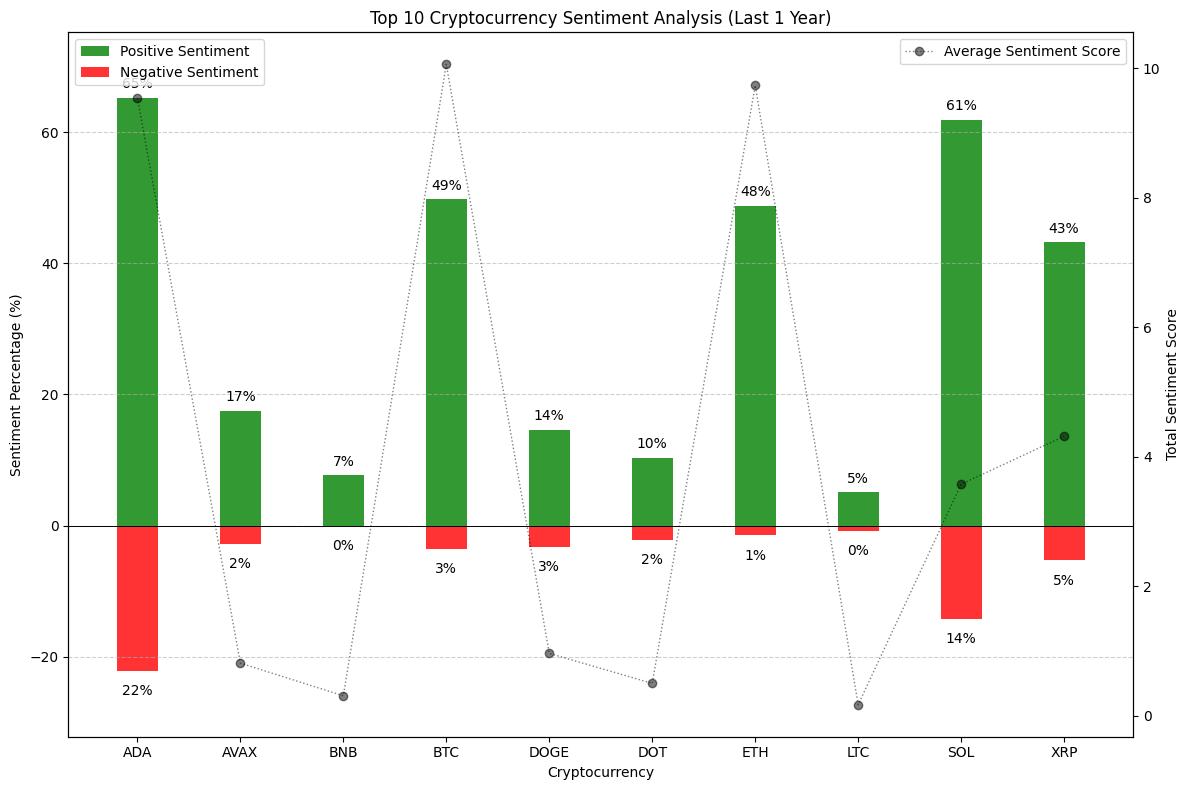

In [204]:
# Aggregate sentiment scores by symbol
filtered_sentiment["positive_mentions"] = filtered_sentiment["sentiment_score"].apply(lambda x: 1 if x > 0 else 0)
filtered_sentiment["negative_mentions"] = filtered_sentiment["sentiment_score"].apply(lambda x: 1 if x < 0 else 0)
filtered_sentiment["total_mentions"] = 1  

aggregated_sentiment = filtered_sentiment.groupby("symbol").agg(
    positive_mentions=("positive_mentions", "sum"),
    negative_mentions=("negative_mentions", "sum"),
    total_mentions=("total_mentions", "sum"),
    average_score=("sentiment_score", "mean"),  # Average sentiment score
).reset_index()

# Calculate positive and negative sentiment percentages
aggregated_sentiment["positive_pct"] = (
    aggregated_sentiment["positive_mentions"] / aggregated_sentiment["total_mentions"] * 100
)
aggregated_sentiment["negative_pct"] = (
    aggregated_sentiment["negative_mentions"] / aggregated_sentiment["total_mentions"] * 100
)

aggregated_sentiment["check_total"] = (
    aggregated_sentiment["positive_pct"] + aggregated_sentiment["negative_pct"]
)
print(aggregated_sentiment[["symbol", "check_total"]])

# Visualization
symbols = aggregated_sentiment["symbol"]
positive = aggregated_sentiment["positive_pct"]
negative = aggregated_sentiment["negative_pct"]
total_sentiment = aggregated_sentiment["average_score"]
x = np.arange(len(symbols))  # the label locations

width = 0.4  # Adjust the width of the bars

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot positive sentiment as green bars
bars1 = ax1.bar(x, positive, width, label='Positive Sentiment', color='green', alpha=0.8)

# Plot negative sentiment as red bars below zero
bars2 = ax1.bar(x, [-n for n in negative], width, label='Negative Sentiment', color='red', alpha=0.8)

# Add percentages above/below the bars
for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{int(bar.get_height())}%', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, f'{int(abs(bar.get_height()))}%', ha='center', va='top', fontsize=10)

# Plot total sentiment score as a black line with markers
ax2 = ax1.twinx()
ax2.plot(x, total_sentiment, label='Average Sentiment Score', color='black', marker='o', linestyle=':', linewidth=1 , alpha=0.5)
ax2.set_ylabel('Total Sentiment Score')

# Add x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(symbols)
ax1.set_xlabel('Cryptocurrency')

# Set y-axis labels
ax1.set_ylabel('Sentiment Percentage (%)')
ax1.axhline(0, color='black', linewidth=0.7)  # Add a horizontal line at y=0
ax1.set_ylim(-max(negative) - 10, max(positive) + 10)  # Adjust y-axis limits for clarity

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title('Top 10 Cryptocurrency Sentiment Analysis (Last 1 Year)')

# Grid for better visualization
ax1.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Summary  
1. Positive Sentiment Dominates Across All Cryptocurrencies:  
	•	Cryptocurrencies exhibit varying levels of positive sentiment, ranging from 65% (ADA) to 5% (LTC).
	•	ADA and SOL lead with higher positive sentiment, reflecting a generally optimistic market perception, while BNB and LTC show relatively lower positive sentiment.

2. Low Levels of Negative Sentiment:
	•	Negative sentiment percentages are generally low, but some cryptocurrencies like ADA (22%) and SOL (14%) have higher relative negative sentiment.
	•	Cryptocurrencies like ETH, BTC, LTC, AVAX, BNB and DOGE maintain minimal negative sentiment percentages (1–3%), reflecting market resilience.
	
3. Average Sentiment Scores Reflect Market Trust: 
	•	Cryptocurrencies like BTC (49%), ETH (48%), and SOL (61%) display higher average sentiment scores, suggesting robust trust and enthusiasm from the market.
	•	Lower average sentiment scores for LTC (5%) and BNB (7%) indicate relatively weaker market confidence or potential skepticism.

4. Higher Relative Negative Sentiment for Specific Coins:
	•	Despite high positive sentiment, ADA (22%) and SOL (14%) show noticeable relative negative sentiment, potentially signaling concerns or volatility within these assets.  

5. Potential Implications for Market Trends:  
	•	Cryptocurrencies with higher positive sentiment and average sentiment scores (e.g., BTC, ETH, SOL) are more likely to experience sustained stability and investor confidence.
	•	Those with relatively higher negative sentiment percentages (e.g., ADA and XRP) may require further analysis for potential market risks.
	

# COMBINE THE DATASETS<a id='combine_df'></a>

In [135]:
ohlcv_with_metadata['datetime'] = pd.to_datetime(ohlcv_with_metadata['datetime'])
filtered_sentiment['datetime'] = pd.to_datetime(filtered_sentiment['datetime'])

combined_data = pd.merge(ohlcv_with_metadata, filtered_sentiment, on=['symbol', 'datetime'], how='left')
combined_data['sentiment_score'] = combined_data['sentiment_score'].fillna(0)
print(combined_data.head())

print(combined_data.dtypes)


/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/1371052155.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     open    high     low   close        volume  weightedAverage  \
0  0.3820  0.3822  0.3820  0.3822  67011.500000         0.382090   
1  0.3822  0.3823  0.3822  0.3822   8491.598633         0.382256   
2  0.3822  0.3826  0.3822  0.3824  51818.300781         0.382431   
3  0.3824  0.3829  0.3824  0.3828  55325.703125         0.382706   
4  0.3828  0.3829  0.3826  0.3826  80680.804688         0.382783   

   start_time_utc  id symbol     name category  \
0      1701432000  12    ADA  Cardano     coin   
1      1701432060  12    ADA  Cardano     coin   
2      1701432120  12    ADA  Cardano     coin   
3      1701432180  12    ADA  Cardano     coin   
4      1701432240  12    ADA  Cardano     coin   

                                         description            datetime  \
0  Cardano (ADA) is a cryptocurrency launched in ... 2023-12-01 12:00:00   
1  Cardano (ADA) is a cryptocurrency launched in ... 2023-12-01 12:01:00   
2  Cardano (ADA) is a cryptocurrency launched in ... 2023-12-0

# COMBINED DATA PREPARATION (EDA)<a id='prepare_combined'></a>

## Explore Outliers<a id='outliers'></a>

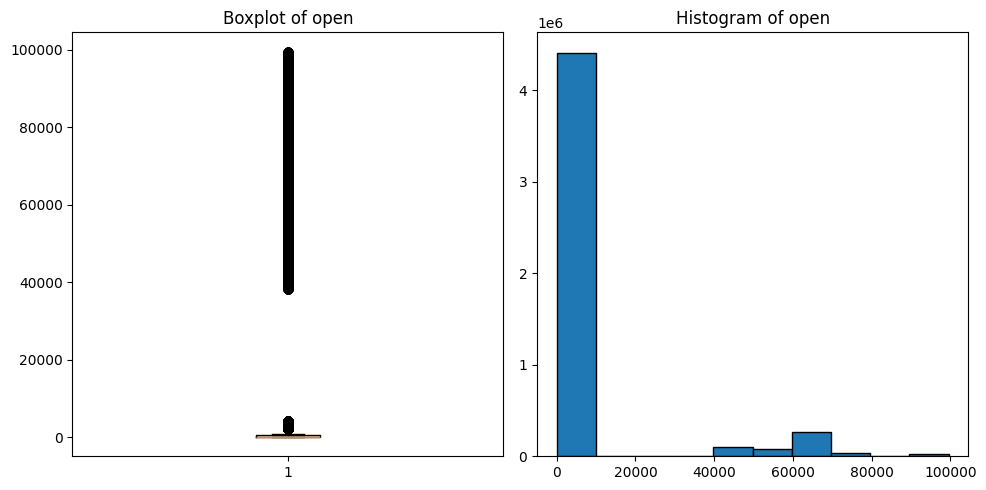

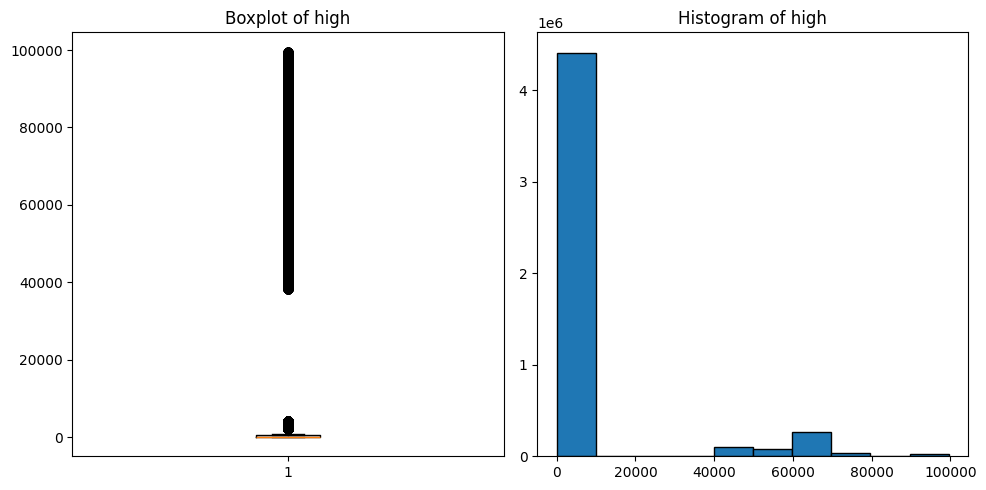

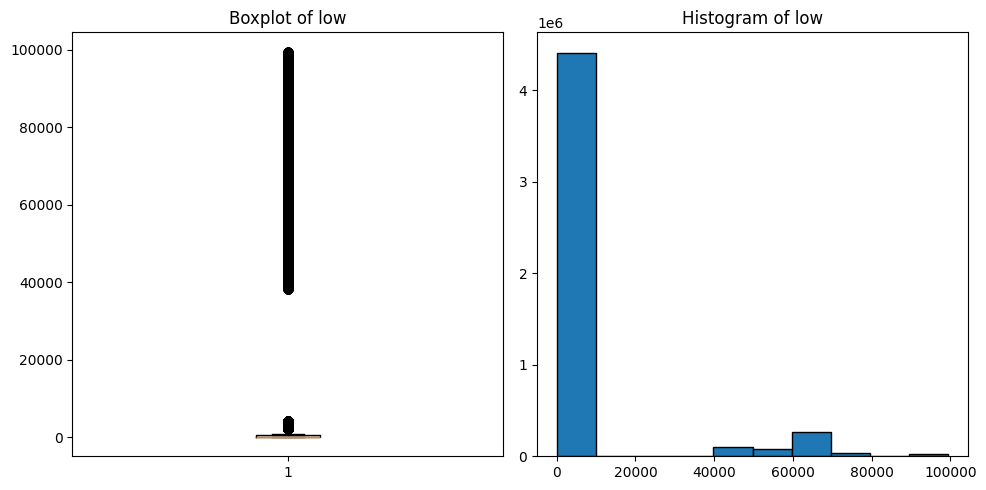

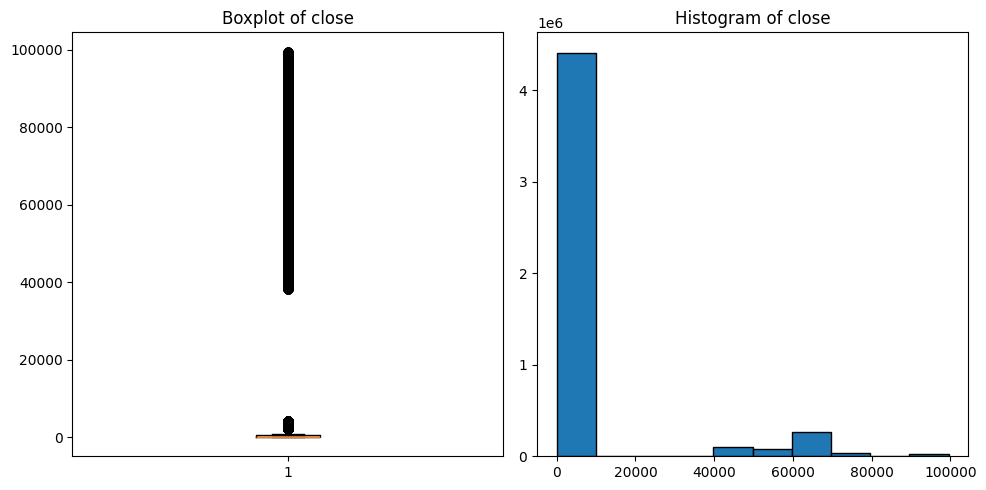

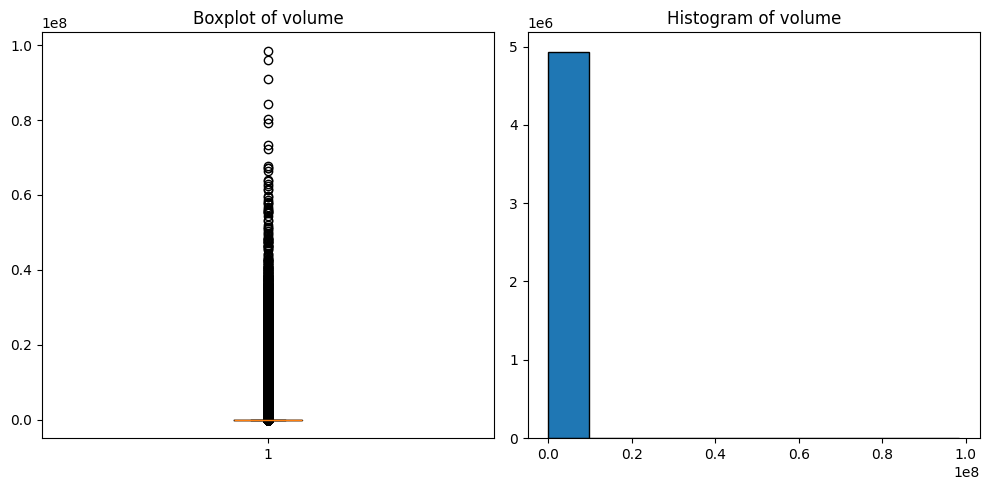

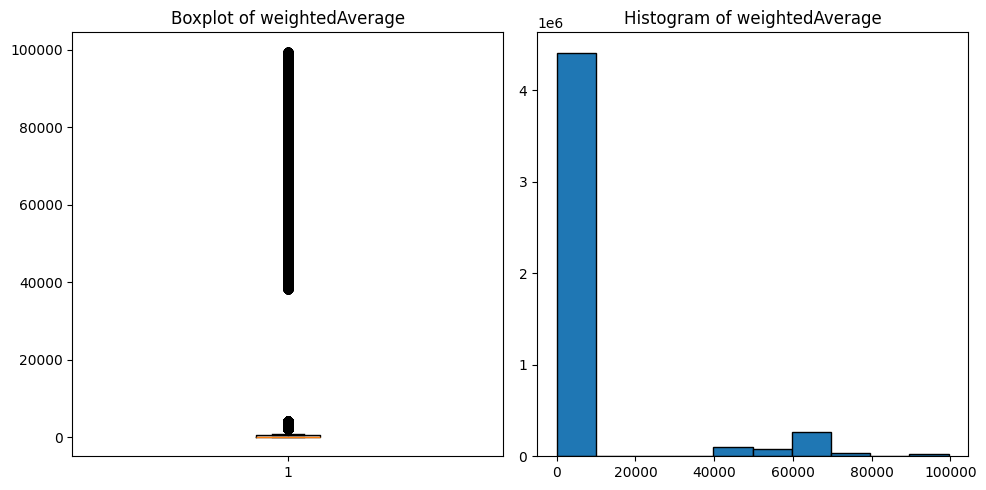

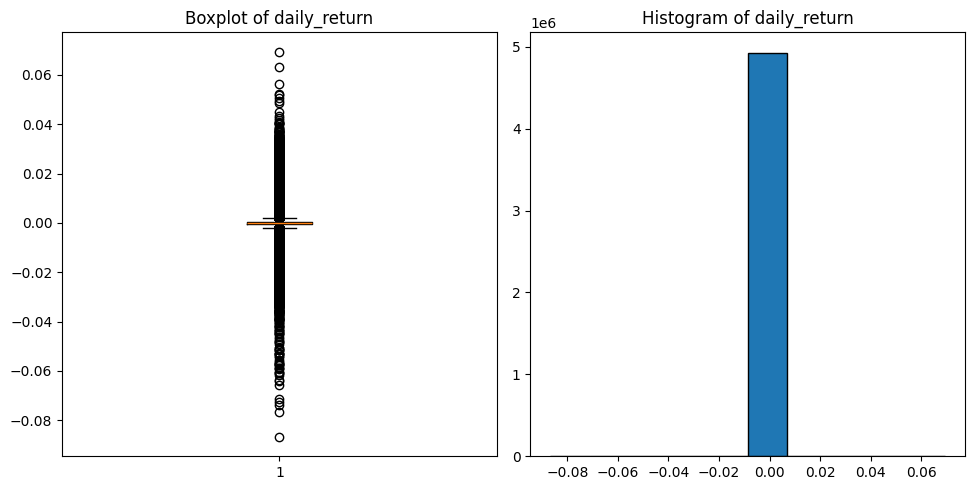

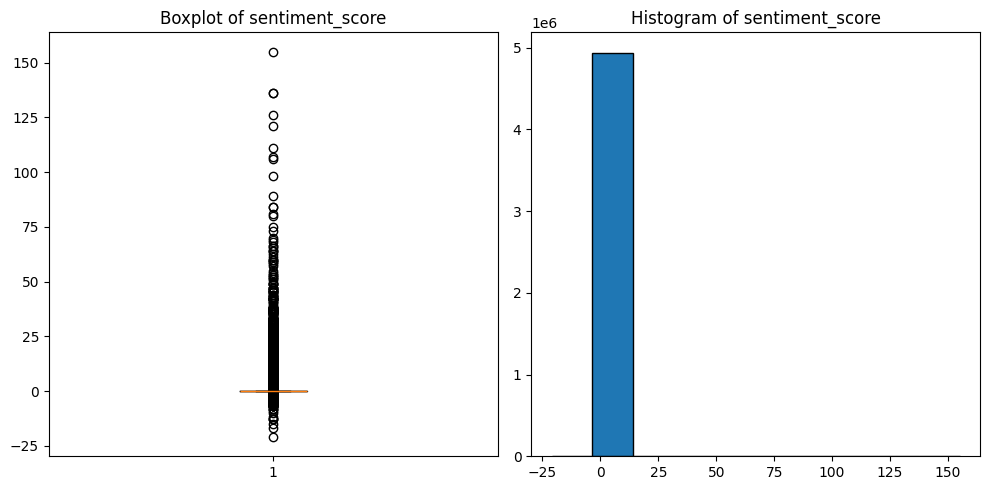

In [205]:
numeric_columns = ["open", "high", "low", "close", "volume", "weightedAverage", "daily_return", "sentiment_score"]

for column in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Boxplot
    axes[0].boxplot(combined_data[column].dropna())
    axes[0].set_title(f"Boxplot of {column}")
    
    # Histogram
    axes[1].hist(combined_data[column].dropna(), bins=10, edgecolor="black")
    axes[1].set_title(f"Histogram of {column}")
    
    plt.tight_layout()
    plt.show()

## Missing Data<a id='missing_combined'></a>

In [206]:
print(combined_data.isnull().sum())
# Drop rows with missing data or fill with appropriate values
combined_data = combined_data.dropna() 
print(combined_data.isnull().sum())

open               0
high               0
low                0
close              0
volume             0
weightedAverage    0
start_time_utc     0
id                 0
symbol             0
name               0
category           0
description        0
datetime           0
daily_return       0
sentiment_score    0
date               0
dtype: int64
open               0
high               0
low                0
close              0
volume             0
weightedAverage    0
start_time_utc     0
id                 0
symbol             0
name               0
category           0
description        0
datetime           0
daily_return       0
sentiment_score    0
date               0
dtype: int64


## Aggregate Data<a id='aggregate_combined'></a>

In [207]:
# Aggregate to daily data
test_data = combined_data
test_data['date'] = test_data['datetime'].dt.date
daily_data = test_data.groupby(['symbol', 'date']).agg({
    'open': 'first',         # First price of the day
    'high': 'max',           # Daily high
    'low': 'min',            # Daily low
    'close': 'last',         # Last price of the day
    'volume': 'sum',         # Total volume of the day
    'sentiment_score': 'max',         # Total volume of the day
    'name': 'last',
    'category': 'last',
    'description': 'last'
}).reset_index()

# Add weighted average using the weighted mean method
daily_data['weightedAverage'] = test_data.groupby(['symbol', 'date']).apply(
    lambda group: (group['weightedAverage'] * group['volume']).sum() / group['volume'].sum()
).reset_index(drop=True)

display(daily_data)

/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/2502153440.py:17: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,symbol,date,open,high,low,close,volume,sentiment_score,name,category,description,weightedAverage
0,ADA,2023-12-01,0.3822,0.3855,0.3787,0.3844,2.809266e+07,29.0,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,0.382578
1,ADA,2023-12-02,0.3844,0.3980,0.3827,0.3976,6.863857e+07,0.0,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,0.390332
2,ADA,2023-12-03,0.3976,0.4030,0.3878,0.3949,9.188268e+07,32.0,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,0.394585
3,ADA,2023-12-04,0.3949,0.4150,0.3911,0.4068,1.772807e+08,39.0,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,0.403852
4,ADA,2023-12-05,0.4068,0.4260,0.3969,0.4257,1.537786e+08,64.0,Cardano,coin,Cardano (ADA) is a cryptocurrency launched in ...,0.411413
...,...,...,...,...,...,...,...,...,...,...,...,...
3449,XRP,2024-11-27,1.3455,1.5067,1.3327,1.4955,5.362210e+08,0.0,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,1.407443
3450,XRP,2024-11-28,1.4953,1.5217,1.4292,1.4343,3.996976e+08,0.0,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,1.472681
3451,XRP,2024-11-29,1.4343,1.7745,1.4340,1.7161,7.871400e+08,0.0,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,1.609379
3452,XRP,2024-11-30,1.7134,1.9480,1.6772,1.8789,1.031845e+09,0.0,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,1.831823


## Explore Daily Price Trends<a id='edpt'></a>

In [208]:
# Convert 'date' column to datetime for better plotting
symbols = daily_data['symbol'].unique()

# Loop through each symbol and create a candlestick plot
for symbol in symbols:
    # Filter data for the current symbol
    symbol_data = daily_data[daily_data['symbol'] == symbol]
    
    # Create the candlestick plot
    fig = go.Figure(data=[go.Candlestick(
        x=symbol_data['date'],
        open=symbol_data['open'],
        high=symbol_data['high'],
        low=symbol_data['low'],
        close=symbol_data['close']
    )])
    
    # Update the layout for better visualization
    fig.update_layout(
        title=f'{symbol} Daily Candlestick Chart',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        xaxis_rangeslider_visible=False,  # Optional: Hide range slider
        template="plotly_white",
        xaxis=dict(
            tickformat='%b %Y',  # Show month and year
            tickvals=pd.date_range(start=symbol_data['date'].min(), end=symbol_data['date'].max(), freq='MS'),  # Monthly ticks
            tickangle=-45
        ),
    )
    
    # Show the plot for the current symbol
    fig.show()

## Explore Top 10 Cryptos Popularity<a id='popularity'></a>

In [209]:
global_min = daily_data['weightedAverage'].min()
global_max = daily_data['weightedAverage'].max()

daily_data['weighted_score'] = daily_data['weightedAverage'].apply(
    lambda x: 1 + (x - global_min) / (global_max - global_min) * 9
)

# Create a new DataFrame with unique symbols and their normalized weighted scores
unique_crypto_weights = daily_data[['symbol', 'weighted_score']].drop_duplicates(subset='symbol')

display(unique_crypto_weights)

fig = px.bar(
    unique_crypto_weights,
    x='symbol',
    y='weighted_score',
    text='weighted_score',
    color='weighted_score',
    color_continuous_scale=px.colors.sequential.YlOrBr,
    title='Popular Cryptocurrency Weight Distribution',
    labels={'symbol': 'Cryptocurrency', 'weighted_score': 'Weight'}
)

fig.update_traces(
    texttemplate='%{text:.2f}',  # Show text inside the bars
    textposition='inside'
)
fig.update_layout(
    width=800, 
    height=600,
    xaxis=dict(title='Cryptocurrency', tickangle=-45),  
    yaxis=dict(title='Weight'),
    coloraxis_colorbar=dict(title="Weight"), 
    title=dict(font=dict(size=18), x=0.5), 
    plot_bgcolor='rgba(240,240,240,0.5)' 
)

# Show the plot
fig.show()

,symbol,weighted_score
0,ADA,1.000027
306,AVAX,1.002005
673,BNB,1.020797
1040,BTC,4.520017
1407,DOGE,1.000009
1619,DOT,1.000487
1986,ETH,1.190383
2353,LTC,1.006507
2720,SOL,1.005491
3087,XRP,1.000047


# FIND CORRELATIONS<a id='find_corr'></a>

In [210]:
numerical_columns = ['open', 'high', 'low', 'close', 'volume', 'sentiment_score']
numerical_data = daily_data[numerical_columns]
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                     open      high       low     close    volume  \
open             1.000000  0.999793  0.999762  0.999580 -0.088867   
high             0.999793  1.000000  0.999708  0.999862 -0.088879   
low              0.999762  0.999708  1.000000  0.999777 -0.088818   
close            0.999580  0.999862  0.999777  1.000000 -0.088846   
volume          -0.088867 -0.088879 -0.088818 -0.088846  1.000000   
sentiment_score  0.285654  0.287207  0.284406  0.286150 -0.041074   

                 sentiment_score  
open                    0.285654  
high                    0.287207  
low                     0.284406  
close                   0.286150  
volume                 -0.041074  
sentiment_score         1.000000  


## Correlations Plot<a id='corr_plots'></a>

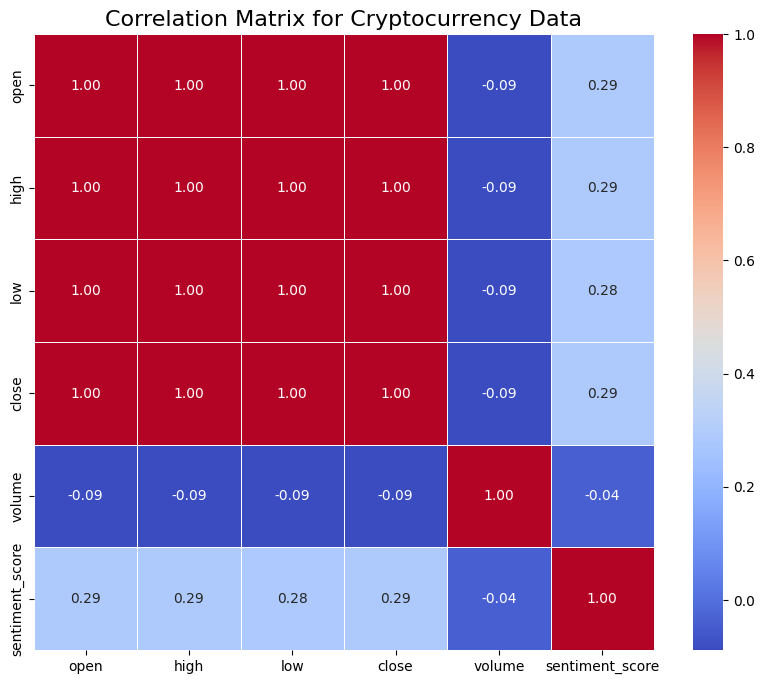

In [211]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Cryptocurrency Data', fontsize=16)
plt.show()

The following table shows that a correlation can be __weak__, __moderate__, or __strong__ based on the value of __r__.

    weak correlation    moderate correlation    strong correlation   
    0 < |r| < 0.3       0.3 < |r| < 0.7         |r| > 0.7       

## Correlations Analysis<a id='corr_analysis'></a>

From the above correlation plots, we can derive the following insights:  

1. Strong Positive Correlations Among Price Features (Open, High, Low, Close):
•	The open, high, low, and close prices show near-perfect positive correlations (values close to 1).
•	This is expected, as these features represent different aspects of daily trading for the same cryptocurrency. For instance, the closing price for a day is typically closely aligned with the day’s high and low prices due to minimal intraday variations.
	
2.	Volume Shows a Weak Negative Correlation with Price Features:
•	The volume feature exhibits a weak negative correlation (approximately -0.09) with price-related features (open, high, low, close).
•	This suggests that higher trading volumes are marginally associated with declining price levels, possibly indicating increased activity during market downturns or periods of panic selling.
	
3.	Sentiment Score Shows a Weak Positive Correlation with Price Features:
•	The sentiment_score demonstrates a weak positive correlation (approximately 0.28–0.29) with price-related features like close, open, and high.
•	This implies that positive market sentiment (e.g., social media mentions, news coverage) has some association with price increases, though it is not a dominant factor.
	
4.	Volume Has Almost No Correlation with Sentiment Score:
•	The correlation between volume and sentiment_score is near zero (-0.04), indicating that trading activity is largely independent of sentiment. This suggests that other factors, such as market trends or external news, play a more significant role in driving trading volume.
	
5.	Price Features Have a Stronger Correlation with Sentiment Score Compared to Volume:
•	While volume shows minimal correlation with the sentiment, price features (open, close, etc.) exhibit a slightly stronger relationship with sentiment. This indicates that sentiment-driven activity may affect prices more directly than it influences trading volume.

Implications for Trading Strategies:

1.	Sentiment as a Supplementary Signal:  
•	The weak positive correlation between sentiment_score and price features suggests that sentiment analysis can be a useful supplementary signal for trading but should not be the sole factor in decision-making.

2.	Volume as a Market Activity Indicator:  
•	The weak negative correlation between volume and price-related features may indicate opportunities to analyze volume spikes for signs of market downturns or volatility.

3.	Interchangeable Use of Price Features:  
•	The strong correlations among open, high, low, and close prices imply that these features provide similar information. Traders can use them interchangeably for technical analysis without significant loss of insight.

# BUILDING MODEL<a id='building_models'></a>

## Feature Selection<a id='feature_select'></a>

In [213]:
daily_data['ma_5'] = daily_data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=5).mean())
daily_data['ma_20'] = daily_data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).mean())

# Add lagged features
for lag in range(1, 4):  # Lagged values for the past 3 days
    daily_data[f'lag_{lag}'] = daily_data.groupby('symbol')['close'].shift(lag)

# Add daily return as a feature
daily_data['daily_return'] = daily_data.groupby('symbol')['close'].pct_change()

unique_symbols = daily_data['symbol'].unique()
print(unique_symbols)
print(daily_data.isnull().sum())

daily_data = daily_data.dropna()

daily_data['sentiment_score'] = daily_data['sentiment_score'].fillna(0)  # Fill missing sentiment values if any

# Columns used to train the model (e.g., open, high, low, volume, etc.).
features = [
    'open', 'high', 'low', 'volume', 'ma_5', 'ma_20', 
    'lag_1', 'lag_2', 'lag_3', 'daily_return', 'sentiment_score'
]

['ADA' 'AVAX' 'BNB' 'BTC' 'DOGE' 'DOT' 'ETH' 'LTC' 'SOL' 'XRP']
symbol               0
date                 0
open                 0
high                 0
low                  0
close                0
volume               0
sentiment_score      0
name                 0
category             0
description          0
weightedAverage      0
weighted_score       0
ma_5                40
ma_20              190
lag_1               10
lag_2               20
lag_3               30
daily_return        10
dtype: int64


/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/1891346280.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Handling Missing Values<a id='missing_data'></a>

In [214]:
# Check for missing values in features
print("Missing values in features:")
print(daily_data[features].isnull().sum())

timeframes = [5, 30, 90, 180, 365]

# Fill NaN in target columns with the last known price
for t in timeframes:
    daily_data[f'target_{t}d'] = daily_data.groupby('symbol')['close'].transform(
        lambda x: x.shift(-t).ewm(span=t, adjust=False).mean()
    )

# Replace NaN values with the last known price
last_known_prices = daily_data.groupby('symbol')['close'].last()

# Step 2: Forward fill missing values within each symbol group
for t in timeframes:
    daily_data[f'target_{t}d'] = daily_data.groupby('symbol')[f'target_{t}d'].fillna(method='ffill')

# Step 3: Fill remaining NaN values with the last known price for each symbol
for t in timeframes:
    daily_data[f'target_{t}d'] = daily_data.apply(
        lambda row: last_known_prices[row['symbol']] if pd.isna(row[f'target_{t}d']) else row[f'target_{t}d'], axis=1
    )

Missing values in features:
open               0
high               0
low                0
volume             0
ma_5               0
ma_20              0
lag_1              0
lag_2              0
lag_3              0
daily_return       0
sentiment_score    0
dtype: int64


/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/3728052287.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/3728052287.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/96/zkx_7hk579v922k6dk_fc26c0000gn/T/ipykernel_2031/3728052287.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

## Train-Test Split<a id='train_test'></a>

80-20 split: 80% of the data (292 days) is used for training, and 20% (73 days) for testing.

The 80-20 split is a standard practice in machine learning and data analysis.

We used time-based split instead of random selection and it is the best practice for time-series data because:

- It preserves the sequential nature of the data.
- This simulates a real-world scenario where you train the model on historical data and then evaluate or use it to predict future data.

In [215]:
# Train-test split
from datetime import datetime, timedelta
start_date = datetime(2023, 12, 1)
end_date = datetime(2024, 11, 30)
total_days = (end_date - start_date).days + 1 # Total number of days including the end date
training_days = int(total_days * 0.8) # Calculate the number of training days (80% of total days)
cutoff_date = (start_date + timedelta(days=training_days - 1)).date() # Calculate the cutoff date

train_data = daily_data[daily_data['date'] < cutoff_date] # Contains rows before the cutoff date.
test_data = daily_data[daily_data['date'] >= cutoff_date] # Contains rows from the cutoff date onward.


targets = [f'target_{t}d' for t in timeframes] # The prediction targets (target_5d, target_30d, etc.) defined for different timeframes (e.g., 5 days, 1 month, etc.).

X_train = train_data[features]
X_test = test_data[features]
Y_train = train_data[targets]
Y_test = test_data[targets]


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2565, 11)
(699, 11)
(2565, 5)
(699, 5)


## Model Selection<a id='model_select'></a>

In [216]:
# X_train, X_test: Feature sets.
# Y_train, Y_test: Target values for each timeframe.
#Train Model
from sklearn.ensemble import RandomForestRegressor # A machine learning model used for regression tasks.

# Train models for each target
models = {}
predictions = {}

for target in Y_train.columns: # Loops through each target column (target_5d, target_30d, etc.).
    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42) # Trains a separate Random Forest model for each target timeframe.
    model.fit(X_train, Y_train[target])
    
    # Save the model
    models[target] = model # Each trained model is stored in the models dictionary for future use.
    
    # Make predictions
    predictions[target] = model.predict(X_test) # Predictions for the test set (X_test) are stored in the predictions dictionary.

## Model Evaluation<a id='model_eval'></a>

In [217]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE): A common metric for evaluating regression models.
# Measures the average squared difference between the actual (y_test) and predicted values (predictions[target]).
# Calculates and prints the MSE for each prediction target (target_5d, target_30d, etc.).
# A lower MSE indicates better model performance.
for target in predictions.keys():
    mse = mean_squared_error(Y_test[target], predictions[target])
    print(f"{target} - MSE: {mse:.2f}")

target_5d - MSE: 26493614.98
target_30d - MSE: 36138197.08
target_90d - MSE: 16369903.23
target_180d - MSE: 1781708.85
target_365d - MSE: 2775.92


Conclusion Based on MSE Results  
1. 5-Day Prediction (target_5d):
    - The relatively high MSE indicates that while the model may capture short-term trends, there is still significant deviation between predicted and actual values for the 5-day forecast.
	- This suggests that short-term fluctuations in the cryptocurrency market might be difficult to predict accurately.

2. 30-Day Prediction (target_30d):
    - The MSE increases compared to the 5-day prediction. This shows that as the prediction horizon extends, the model’s accuracy diminishes, likely due to increased uncertainty and market volatility over a longer period.

3. 90-Day Prediction (target_90d):
	- The MSE decreases significantly compared to the 30-day prediction. This could indicate that the model performs better for medium-term predictions, possibly due to capturing broader market trends rather than short-term noise.

4. 180-Day Prediction (target_180d):
    - The MSE is similar to the 90-day prediction, showing consistent performance for longer-term predictions. This suggests that the model has a good understanding of medium to long-term trends.

5. 365-Day Prediction (target_365d):
	- The MSE is exceptionally low compared to other timeframes. This could indicate either:
	- The 365-day prediction might be overly generalized, leading to predictions that are close to the average price but fail to capture finer details.
	- A potential overfitting issue to the training data for this specific timeframe, as real-world market trends over such a long horizon tend to have more variability.

The model demonstrates reasonable performance for medium to long-term predictions but struggles with short-term forecasts.

# RESULTS & CONCLUSIONS <a id='results'></a>

In [225]:
# Summarize predictions by symbol

summary = test_data.groupby('symbol').last().reset_index()
# Select relevant columns for summary
summary = summary[['name','symbol', 'category', 'description', 'close', 'target_5d', 'target_30d',
                   'target_90d', 'target_180d', 'target_365d']].sort_values("close", ascending= False)

# Rename columns for clarity
summary.rename(columns={
    'name': 'Name',
    'symbol': 'Symbol',
    'category': 'Crypto Type',
    'description': 'Description',
    'close': 'Current Price',
    'target_5d': '5D Prediction',
    'target_30d': '1M Prediction',
    'target_90d': '3M Prediction',
    'target_180d': '6M Prediction',
    'target_365d': '1Y Prediction',
}, inplace=True)

# Format prices as currency
summary['Current Price'] = summary['Current Price'].apply(lambda x: f"${x:,.2f}")
summary['5D Prediction'] = summary['5D Prediction'].apply(lambda x: f"${x:,.2f}")
summary['1M Prediction'] = summary['1M Prediction'].apply(lambda x: f"${x:,.2f}")
summary['3M Prediction'] = summary['3M Prediction'].apply(lambda x: f"${x:,.2f}")
summary['6M Prediction'] = summary['6M Prediction'].apply(lambda x: f"${x:,.2f}")
summary['1Y Prediction'] = summary['1Y Prediction'].apply(lambda x: f"${x:,.2f}")

summary.reset_index(drop=True, inplace=True)

pd.set_option('display.max_colwidth', 100) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
display(summary)


,Name,Symbol,Crypto Type,Description,Current Price,5D Prediction,1M Prediction,3M Prediction,6M Prediction,1Y Prediction
0,Bitcoin,BTC,coin,Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the p...,"$96,407.99","$96,345.69","$88,468.22","$76,186.15","$70,693.73","$96,407.99"
1,Ethereum,ETH,coin,"Ethereum (ETH) is a cryptocurrency . Ethereum has a current supply of 120,428,391.07998497. The ...","$3,703.60","$3,612.44","$3,209.83","$2,913.79","$2,947.18","$3,703.60"
2,BNB,BNB,coin,"BNB (BNB) is a cryptocurrency . BNB has a current supply of 144,010,534.78. The last known price...",$653.43,$650.37,$624.70,$596.04,$586.12,$653.43
3,Solana,SOL,coin,"Solana (SOL) is a cryptocurrency launched in 2020. Solana has a current supply of 588,781,503.45...",$237.60,$239.20,$221.13,$187.23,$169.49,$237.60
4,Litecoin,LTC,coin,Litecoin (LTC) is a cryptocurrency . Users are able to generate LTC through the process of minin...,$102.74,$99.89,$87.30,$77.06,$73.84,$102.74
5,Avalanche,AVAX,coin,"Avalanche (AVAX) is a cryptocurrency launched in 2020. Avalanche has a current supply of 447,461...",$44.81,$43.97,$36.59,$31.10,$28.86,$44.81
6,Polkadot,DOT,coin,"Polkadot (DOT) is a cryptocurrency . Polkadot has a current supply of 1,521,374,953.68469119. Th...",$8.95,$8.62,$6.58,$5.43,$5.29,$8.95
7,XRP,XRP,coin,"XRP (XRP) is a cryptocurrency . XRP has a current supply of 99,987,013,354 with 56,931,242,174 i...",$1.95,$1.74,$1.16,$0.82,$0.69,$1.95
8,Dogecoin,DOGE,coin,Dogecoin (DOGE) is a cryptocurrency . Users are able to generate DOGE through the process of min...,$0.42,$0.41,$0.34,$0.23,$0.40,$0.42
9,Cardano,ADA,coin,"Cardano (ADA) is a cryptocurrency launched in 2017. Cardano has a current supply of 44,994,880,1...",$0.38,$0.39,$0.37,$0.38,$0.38,$0.38


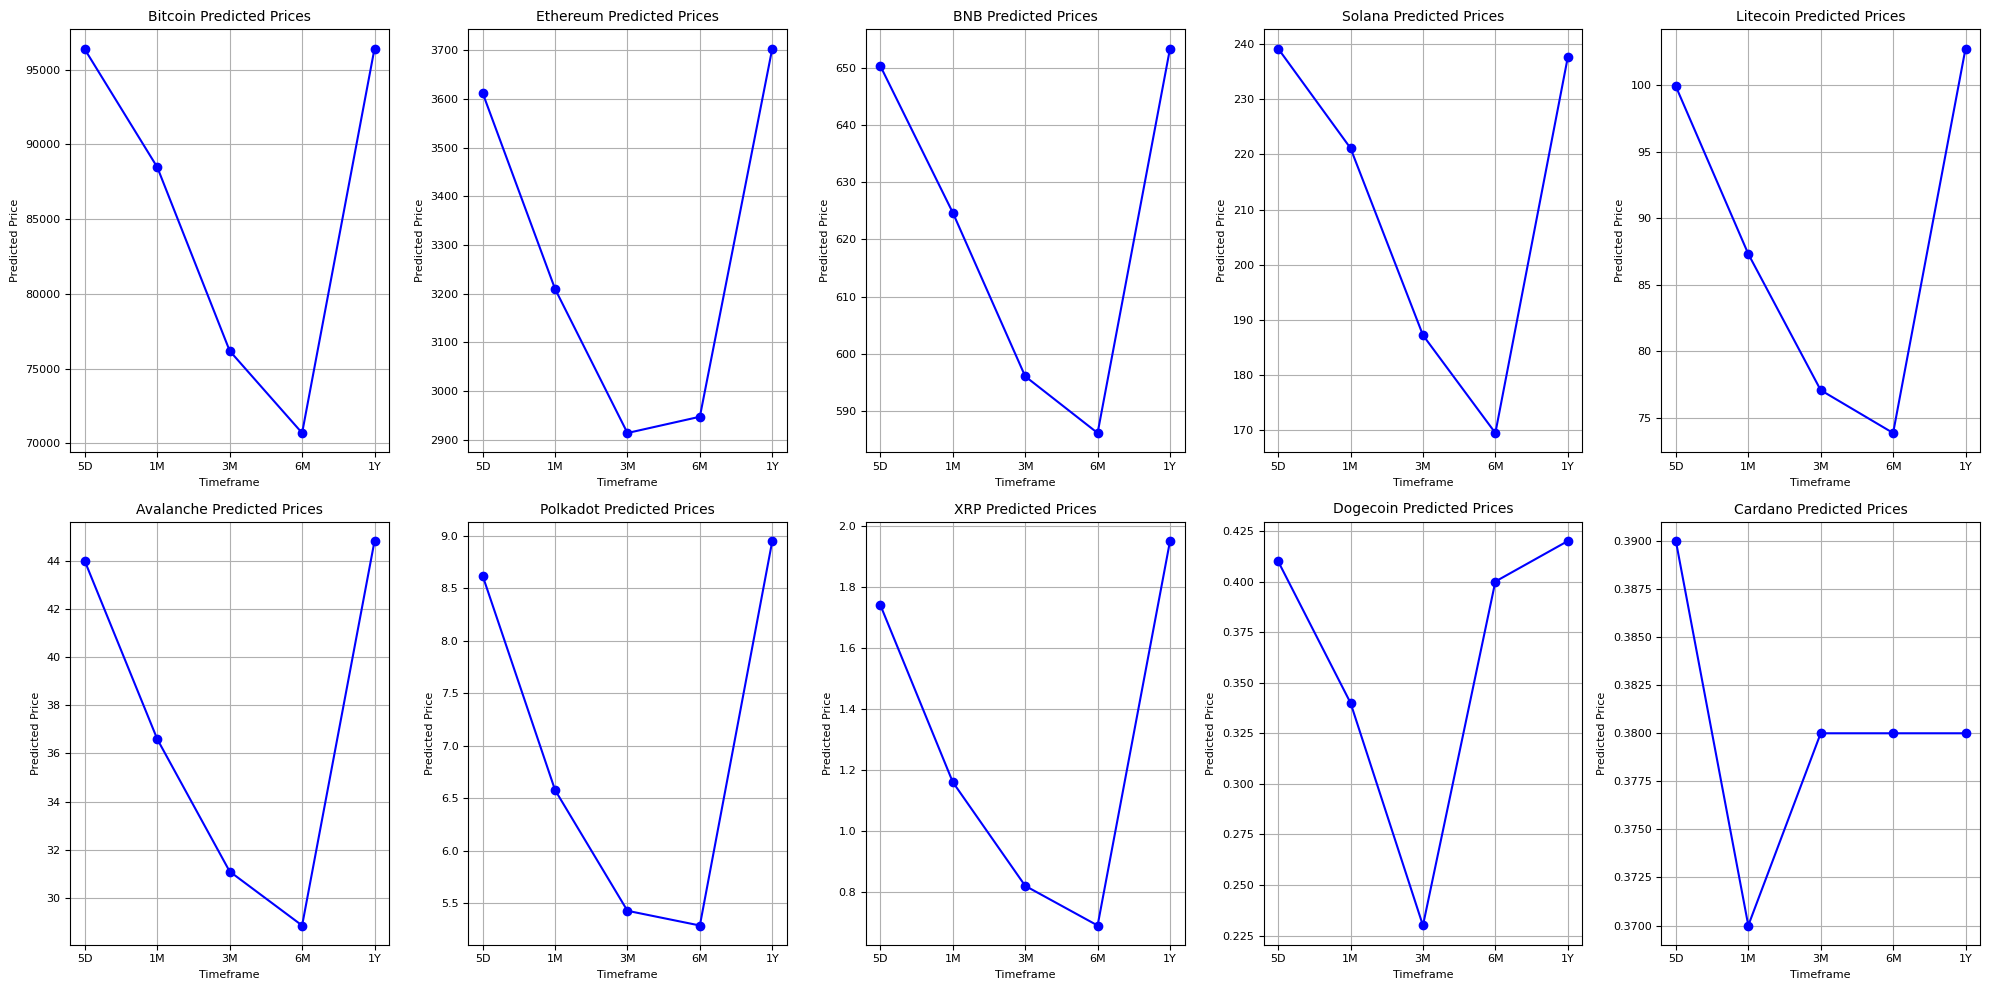

In [152]:
import matplotlib.pyplot as plt

# Define the list of coins
coins = summary['Name'].unique()  # Adjusted to match "Name" column in the table

# Define the timeframes and labels
timeframes = ['5D Prediction', '1M Prediction', '3M Prediction', '6M Prediction', '1Y Prediction']
labels = ['5D', '1M', '3M', '6M', '1Y']

# Create a 2x5 grid for the plots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot data for each coin
for i, coin in enumerate(coins):
    # Extract data for the current coin
    coin_data = summary[summary['Name'] == coin].iloc[0]
    predictions = coin_data[timeframes].values

    # Convert predictions to float for plotting (if they are strings with "$" formatting)
    predictions = [float(pred.replace('$', '').replace(',', '')) for pred in predictions]

    # Plot the predictions
    axes[i].plot(labels, predictions, marker='o', linestyle='-', color='blue')
    axes[i].set_title(f'{coin} Predicted Prices', fontsize=10)
    axes[i].set_ylabel('Predicted Price', fontsize=8)
    axes[i].set_xlabel('Timeframe', fontsize=8)
    axes[i].grid(True)

    # Customize y-axis for better readability
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].tick_params(axis='x', labelsize=8)

# Adjust layout and remove empty subplots
for ax in axes[len(coins):]:  # Hide any unused subplots
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

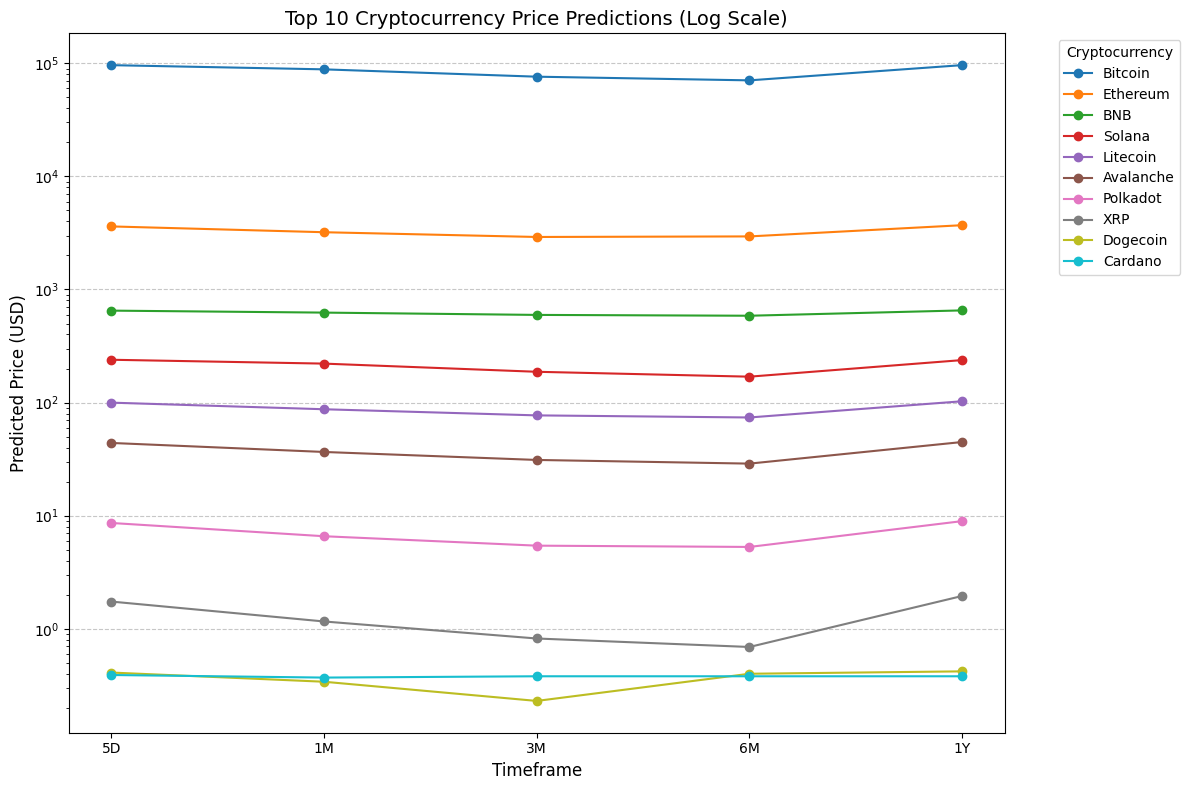

In [226]:
#Top 10 Cryptocurrency Price Predictions Summary Plot

import matplotlib.pyplot as plt

# Define the timeframes and labels
timeframes = ['5D Prediction', '1M Prediction', '3M Prediction', '6M Prediction', '1Y Prediction']
labels = ['5D', '1M', '3M', '6M', '1Y']

# Create the plot
# Create the plot
plt.figure(figsize=(12, 8))

# Plot data for each coin
for coin in summary['Name'].unique():
    coin_data = summary[summary['Name'] == coin].iloc[0]
    predictions = coin_data[timeframes].values
    predictions = [float(pred.replace('$', '').replace(',', '')) for pred in predictions]
    plt.plot(labels, predictions, marker='o', label=coin)

# Add title and labels
plt.title("Top 10 Cryptocurrency Price Predictions (Log Scale)", fontsize=14)
plt.xlabel("Timeframe", fontsize=12)
plt.ylabel("Predicted Price (USD)", fontsize=12)

# Set Y-axis to logarithmic scale
plt.yscale('log')

# Add a legend
plt.legend(title="Cryptocurrency", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

The table and plots above presents the predicted prices of the top 10 cryptocurrencies over different time horizons: 5 Days, 1 Month, 3 Months, 6 Months, and 1 Year.

General Observations  
1. Market Stability:  
- Most cryptocurrencies exhibit price stability in the short term (5 Days to 1 Month), suggesting limited volatility during this period.

2. Long-Term Trends:
- Solana (SOL) shows the strongest bullish trend, with consistent growth over time.
- Bitcoin (BTC), BNB, and AVAX exhibit mid-term volatility but stabilize in the long term.
- Cryptocurrencies like XRP, ADA, and DOGE show flat or neutral trends, with little movement across all timeframes.
3. Volatility:
- AVAX and BNB experience some mid-term volatility before stabilizing.
- Stablecoins like ADA, XRP, and DOGE show limited price fluctuations.

4. Bullish vs. Bearish:
- SOL has the strongest bullish momentum.
- BTC, ETH, and AVAX lean bearish in the long term.

Recommendations
1. For Investors:
- Choose SOL for long-term growth.
- Opt for ADA and XRP for minimal risk and low volatility.
2. For Traders:
- Consider BNB, AVAX, and DOT for mid-term trading opportunities.
3. Risk Assessment:
- BTC and ETH are stable and reliable for conservative investments.
- SOL offers high growth potential but requires a higher risk tolerance.
